# Population growth, fertility, life expectancy and mortality

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Growth, Fertility and Mortality Indicators.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248.0,NaN,"World Health Organization (WHO), the United Na...",NaN
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
...,...,...,...,...,...,...,...,...
4894,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
4895,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ...",NaN
4896,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
4897,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN


In [5]:
df.shape

(4899, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  4899 non-null   int64  
 1   Unnamed: 1           4899 non-null   object 
 2   Year                 4899 non-null   int64  
 3   Series               4899 non-null   object 
 4   Value                4899 non-null   float64
 5   Footnotes            4263 non-null   object 
 6   Source               4899 non-null   object 
 7   Unnamed: 7           294 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 306.3+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Region/Country/Area',
                   }, inplace=True)

df        

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248.0,NaN,"World Health Organization (WHO), the United Na...",NaN
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
...,...,...,...,...,...,...,...,...
4894,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
4895,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ...",NaN
4896,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
4897,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Value']]
df1

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248.0
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9
...,...,...,...,...,...
4894,716,Zimbabwe,2020,Total fertility rate (children per women),3.6
4895,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7
4896,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8
4897,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2


In [9]:
df1.shape

(4899, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 4899 non-null   int64  
 1   Region/Country/Area  4899 non-null   object 
 2   Year                 4899 non-null   int64  
 3   Series               4899 non-null   object 
 4   Value                4899 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 191.5+ KB


In [11]:
df1.describe(include='object')

,Region/Country/Area,Series
count,4899,4899
unique,265,7
top,"Total, all countries or areas",Population annual rate of increase (percent)
freq,21,795


In [12]:
df1['Region/Country/Area'].value_counts()

Total, all countries or areas    21
Mozambique                       21
Malawi                           21
Malaysia                         21
Maldives                         21
                                 ..
Cayman Islands                    3
Bermuda                           3
Isle of Man                       3
Monaco                            3
Sint Maarten (Dutch part)         3
Name: Region/Country/Area, Length: 265, dtype: int64

In [13]:
df1['Series'].value_counts()

Population annual rate of increase (percent)                795
Total fertility rate (children per women)                   693
Infant mortality for both sexes (per 1,000 live births)     693
Life expectancy at birth for both sexes (years)             693
Life expectancy at birth for males (years)                  693
Life expectancy at birth for females (years)                693
Maternal mortality ratio (deaths per 100,000 population)    639
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

1      21
508    21
454    21
458    21
462    21
       ..
136     3
60      3
833     3
492     3
534     3
Name: Code, Length: 265, dtype: int64

# Data Cleaning

In [15]:
df1['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion',
    'Saint Barth�lemy': 'Saint Barthélemy'}, inplace=True
)

df1['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Northern America',
       'Latin America & the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'South-central Asia', 'South-eastern Asia', 'Southern Asia',
       'Western Asia', 'Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatius & Saba',
 

In [16]:
df1['Year'].value_counts()

2010    1633
2015    1633
2020    1420
2017     213
Name: Year, dtype: int64

In [17]:
df1['Value'].describe()

count    4899.000000
mean       56.634946
std       102.904145
min        -3.400000
25%         2.900000
50%        53.300000
75%        74.200000
max      1360.000000
Name: Value, dtype: float64

# Missing Values Exploration

In [18]:
df1.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

Filter By Region

In [19]:
regions = ['Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa', 
           'Americas', 'Northern America', 'Latin America & the Caribbean', 'Caribbean', 'Central America', 'South America', 'Asia', 
           'Central Asia', 'Eastern Asia', 'South-central Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe', 
           'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia']

df_reg_filt = df1[df1['Region/Country/Area'].isin(regions)]
df_reg_filt

,Code,Region/Country/Area,Year,Series,Value
21,2,Africa,2010,Population annual rate of increase (percent),2.5
22,2,Africa,2010,Total fertility rate (children per women),4.9
23,2,Africa,2010,"Infant mortality for both sexes (per 1,000 liv...",67.7
24,2,Africa,2010,Life expectancy at birth for both sexes (years),56.8
25,2,Africa,2010,Life expectancy at birth for males (years),55.2
...,...,...,...,...,...
577,54,Melanesia,2020,Total fertility rate (children per women),3.5
578,54,Melanesia,2020,"Infant mortality for both sexes (per 1,000 liv...",37.5
579,54,Melanesia,2020,Life expectancy at birth for both sexes (years),65.4
580,54,Melanesia,2020,Life expectancy at birth for males (years),64.1


In [20]:
df_reg_filt.rename(columns={
    'Region/Country/Area': 'Region'
}, inplace=True)

df_reg_filt

,Code,Region,Year,Series,Value
21,2,Africa,2010,Population annual rate of increase (percent),2.5
22,2,Africa,2010,Total fertility rate (children per women),4.9
23,2,Africa,2010,"Infant mortality for both sexes (per 1,000 liv...",67.7
24,2,Africa,2010,Life expectancy at birth for both sexes (years),56.8
25,2,Africa,2010,Life expectancy at birth for males (years),55.2
...,...,...,...,...,...
577,54,Melanesia,2020,Total fertility rate (children per women),3.5
578,54,Melanesia,2020,"Infant mortality for both sexes (per 1,000 liv...",37.5
579,54,Melanesia,2020,Life expectancy at birth for both sexes (years),65.4
580,54,Melanesia,2020,Life expectancy at birth for males (years),64.1


Filter Population annual rate of increase in Percentage

In [21]:
percentage = ['Population annual rate of increase (percent)']

df_reg_filt_pct = df_reg_filt[df_reg_filt['Series'].isin(percentage)]
df_reg_filt_pct

,Code,Region,Year,Series,Value
21,2,Africa,2010,Population annual rate of increase (percent),2.5
27,2,Africa,2015,Population annual rate of increase (percent),2.6
33,2,Africa,2020,Population annual rate of increase (percent),2.5
39,15,Northern Africa,2010,Population annual rate of increase (percent),1.7
46,15,Northern Africa,2015,Population annual rate of increase (percent),2.0
...,...,...,...,...,...
547,53,Australia and New Zealand,2015,Population annual rate of increase (percent),1.5
555,53,Australia and New Zealand,2020,Population annual rate of increase (percent),1.2
561,54,Melanesia,2010,Population annual rate of increase (percent),2.2
568,54,Melanesia,2015,Population annual rate of increase (percent),1.9


# Population annual rate of increase by Region Exploration

Filter Africa, Americas, Asia, Australia and New Zealand, Oceania and Europe Continents

In [22]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df = df_reg_filt_pct[df_reg_filt_pct['Region'].isin(continents)]
continents_df.head()

,Code,Region,Year,Series,Value
21,2,Africa,2010,Population annual rate of increase (percent),2.5
27,2,Africa,2015,Population annual rate of increase (percent),2.6
33,2,Africa,2020,Population annual rate of increase (percent),2.5
270,142,Asia,2010,Population annual rate of increase (percent),1.1
276,142,Asia,2015,Population annual rate of increase (percent),1.0


In [23]:
# bar plot helper function
def plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None):

    # set plot theme
    sns.set_theme(style='white', context='talk')

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        x=x, y=y, 
        hue=hue, data=df, ci=None, 
        ax=ax
    )

    # despine axes
    sns.despine(left=True, bottom=True)

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar

<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

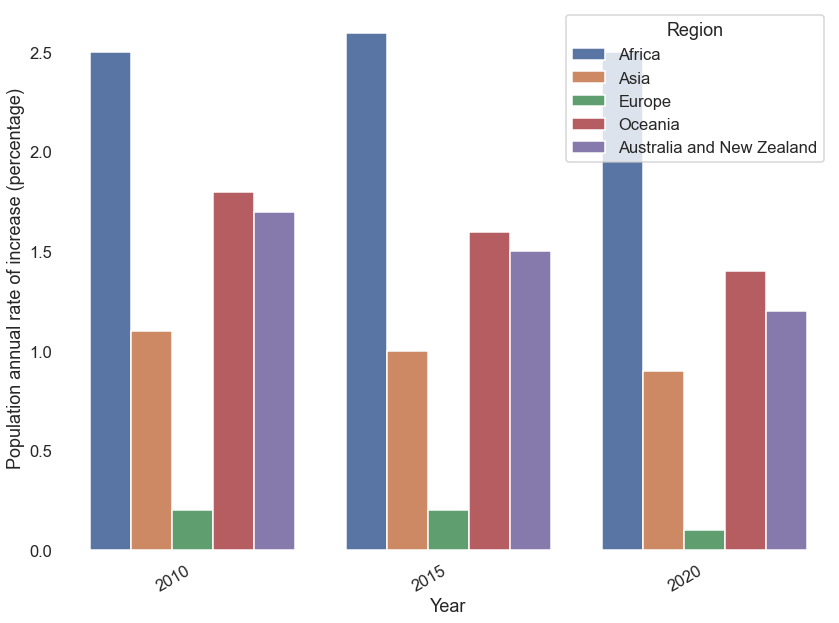

In [24]:
plot_bar(df=continents_df,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Population annual rate of increase (percentage)')

# Total fertility rate by Region Exploration

Filter Total fertility rate (children per women) 

In [25]:
tot_fert = ['Total fertility rate (children per women)']

df_reg_filt_totfert = df_reg_filt[df_reg_filt['Series'].isin(tot_fert)]
df_reg_filt_totfert

,Code,Region,Year,Series,Value
22,2,Africa,2010,Total fertility rate (children per women),4.9
28,2,Africa,2015,Total fertility rate (children per women),4.7
34,2,Africa,2020,Total fertility rate (children per women),4.4
40,15,Northern Africa,2010,Total fertility rate (children per women),3.1
47,15,Northern Africa,2015,Total fertility rate (children per women),3.3
...,...,...,...,...,...
548,53,Australia and New Zealand,2015,Total fertility rate (children per women),1.9
556,53,Australia and New Zealand,2020,Total fertility rate (children per women),1.8
562,54,Melanesia,2010,Total fertility rate (children per women),3.9
569,54,Melanesia,2015,Total fertility rate (children per women),3.7


In [26]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df1 = df_reg_filt_totfert[df_reg_filt_totfert['Region'].isin(continents)]
continents_df1.head()

,Code,Region,Year,Series,Value
22,2,Africa,2010,Total fertility rate (children per women),4.9
28,2,Africa,2015,Total fertility rate (children per women),4.7
34,2,Africa,2020,Total fertility rate (children per women),4.4
271,142,Asia,2010,Total fertility rate (children per women),2.3
277,142,Asia,2015,Total fertility rate (children per women),2.2


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

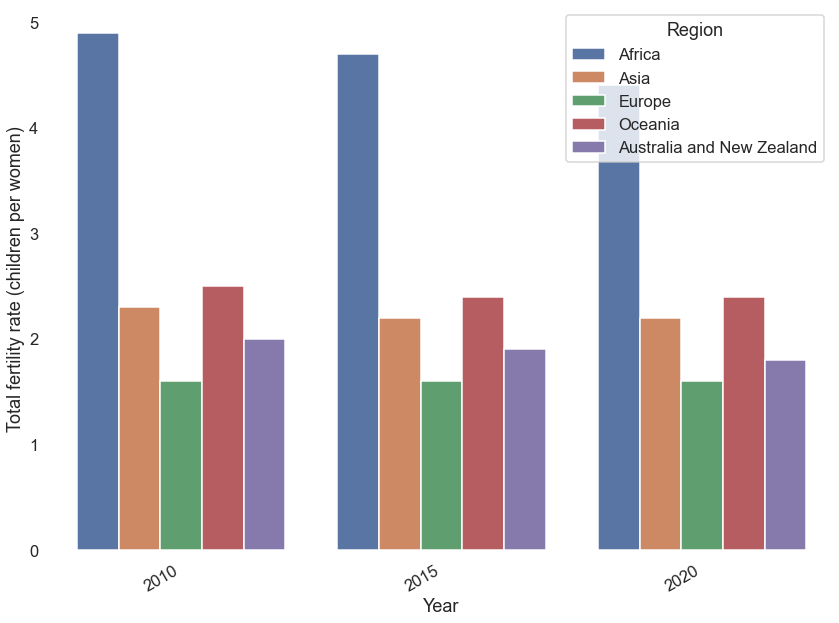

In [27]:
plot_bar(df=continents_df1,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Total fertility rate (children per women)')

# Infant mortality by Region Exploration

Filter Infant mortality for both sexes (per 1,000 live births)

In [28]:
inf_mort = ['Infant mortality for both sexes (per 1,000 live births)']

df_reg_filt_infmort = df_reg_filt[df_reg_filt['Series'].isin(inf_mort)]
df_reg_filt_infmort

,Code,Region,Year,Series,Value
23,2,Africa,2010,"Infant mortality for both sexes (per 1,000 liv...",67.7
29,2,Africa,2015,"Infant mortality for both sexes (per 1,000 liv...",55.9
35,2,Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",47.5
41,15,Northern Africa,2010,"Infant mortality for both sexes (per 1,000 liv...",31.7
48,15,Northern Africa,2015,"Infant mortality for both sexes (per 1,000 liv...",26.6
...,...,...,...,...,...
549,53,Australia and New Zealand,2015,"Infant mortality for both sexes (per 1,000 liv...",3.7
557,53,Australia and New Zealand,2020,"Infant mortality for both sexes (per 1,000 liv...",3.2
563,54,Melanesia,2010,"Infant mortality for both sexes (per 1,000 liv...",48.4
570,54,Melanesia,2015,"Infant mortality for both sexes (per 1,000 liv...",43.1


In [29]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df2 = df_reg_filt_infmort[df_reg_filt_infmort['Region'].isin(continents)]
continents_df2.head()

,Code,Region,Year,Series,Value
23,2,Africa,2010,"Infant mortality for both sexes (per 1,000 liv...",67.7
29,2,Africa,2015,"Infant mortality for both sexes (per 1,000 liv...",55.9
35,2,Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",47.5
272,142,Asia,2010,"Infant mortality for both sexes (per 1,000 liv...",37.1
278,142,Asia,2015,"Infant mortality for both sexes (per 1,000 liv...",29.5


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

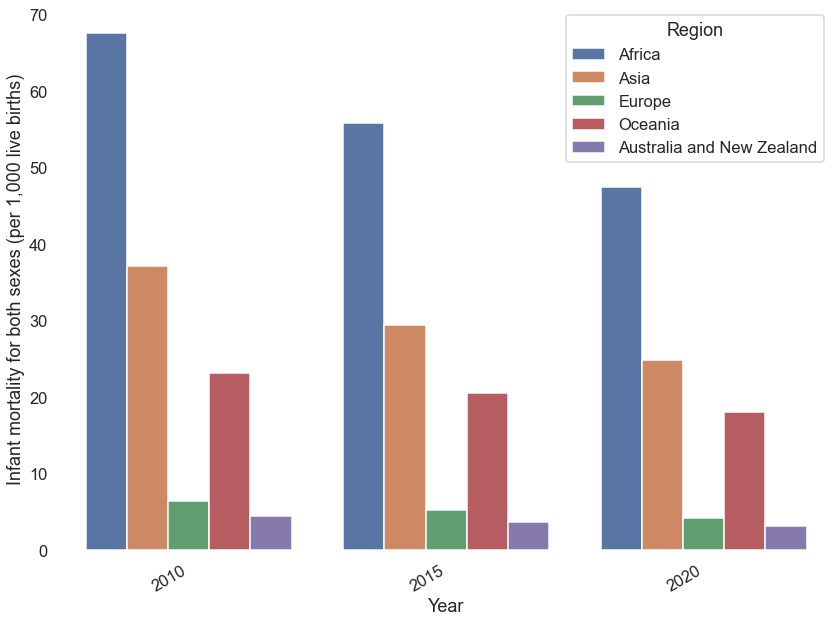

In [30]:
plot_bar(df=continents_df2,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Infant mortality for both sexes (per 1,000 live births)')

# Life expectancy at birth by Region Exploration

Filter Life expectancy at birth in Years

In [31]:
life_expect = ['Life expectancy at birth for both sexes (years)',
               'Life expectancy at birth for males (years)',     
               'Life expectancy at birth for females (years)']

df_reg_filt_lifeexpect = df_reg_filt[df_reg_filt['Series'].isin(life_expect)]
df_reg_filt_lifeexpect

,Code,Region,Year,Series,Value
24,2,Africa,2010,Life expectancy at birth for both sexes (years),56.8
25,2,Africa,2010,Life expectancy at birth for males (years),55.2
26,2,Africa,2010,Life expectancy at birth for females (years),58.3
30,2,Africa,2015,Life expectancy at birth for both sexes (years),60.2
31,2,Africa,2015,Life expectancy at birth for males (years),58.6
...,...,...,...,...,...
573,54,Melanesia,2015,Life expectancy at birth for males (years),62.7
574,54,Melanesia,2015,Life expectancy at birth for females (years),65.5
579,54,Melanesia,2020,Life expectancy at birth for both sexes (years),65.4
580,54,Melanesia,2020,Life expectancy at birth for males (years),64.1


In [32]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df3 = df_reg_filt_lifeexpect[df_reg_filt_lifeexpect['Region'].isin(continents)]
continents_df3.head()

,Code,Region,Year,Series,Value
24,2,Africa,2010,Life expectancy at birth for both sexes (years),56.8
25,2,Africa,2010,Life expectancy at birth for males (years),55.2
26,2,Africa,2010,Life expectancy at birth for females (years),58.3
30,2,Africa,2015,Life expectancy at birth for both sexes (years),60.2
31,2,Africa,2015,Life expectancy at birth for males (years),58.6


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

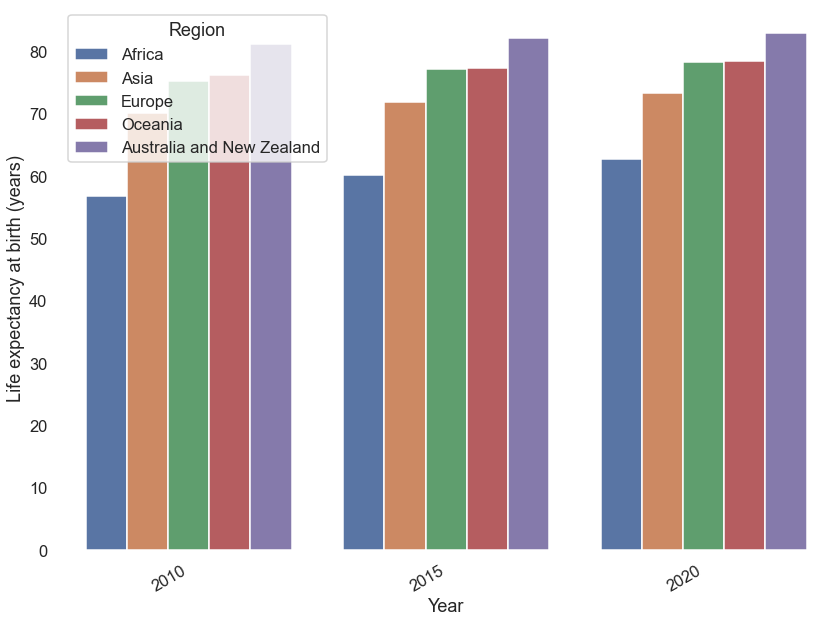

In [33]:
plot_bar(df=continents_df3,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Life expectancy at birth (years)')

# Maternal mortality ratio by Region Exploration

Filter Maternal mortality ratio

In [34]:
mat_mort = ['Maternal mortality ratio (deaths per 100,000 population)']

df_reg_filt_matmort = df_reg_filt[df_reg_filt['Series'].isin(mat_mort)]
df_reg_filt_matmort

,Code,Region,Year,Series,Value
42,15,Northern Africa,2010,"Maternal mortality ratio (deaths per 100,000 p...",145.0
49,15,Northern Africa,2015,"Maternal mortality ratio (deaths per 100,000 p...",118.0
53,15,Northern Africa,2017,"Maternal mortality ratio (deaths per 100,000 p...",112.0
63,202,Sub-Saharan Africa,2010,"Maternal mortality ratio (deaths per 100,000 p...",635.0
70,202,Sub-Saharan Africa,2015,"Maternal mortality ratio (deaths per 100,000 p...",566.0
...,...,...,...,...,...
550,53,Australia and New Zealand,2015,"Maternal mortality ratio (deaths per 100,000 p...",7.0
554,53,Australia and New Zealand,2017,"Maternal mortality ratio (deaths per 100,000 p...",7.0
564,54,Melanesia,2010,"Maternal mortality ratio (deaths per 100,000 p...",155.0
571,54,Melanesia,2015,"Maternal mortality ratio (deaths per 100,000 p...",138.0


In [35]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df4 = df_reg_filt_matmort[df_reg_filt_matmort['Region'].isin(continents)]
continents_df4.head()

,Code,Region,Year,Series,Value
417,150,Europe,2010,"Maternal mortality ratio (deaths per 100,000 p...",13.0
424,150,Europe,2015,"Maternal mortality ratio (deaths per 100,000 p...",10.0
428,150,Europe,2017,"Maternal mortality ratio (deaths per 100,000 p...",10.0
522,9,Oceania,2010,"Maternal mortality ratio (deaths per 100,000 p...",69.0
529,9,Oceania,2015,"Maternal mortality ratio (deaths per 100,000 p...",62.0


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

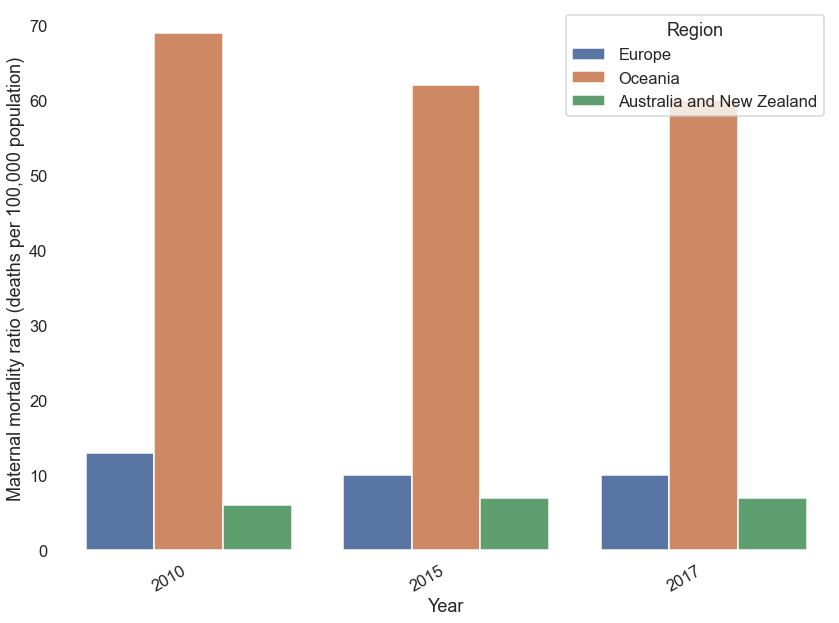

In [36]:
plot_bar(df=continents_df4,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Maternal mortality ratio (deaths per 100,000 population)')